# ANÁLISIS DE LA SOBRE-EXTENSIÓN AL ALZA DEL MERCADO ACCIONARIO NORTEAMERICANO

Me puse a tratar de refutar con los datos la afirmación de la sobreextensión y si bien no estaba errado (venía al 26% aprox el precio sobre la MM 30 meses), con el último sacudón se acercó al promedio y anda en 16% aprox. Usé la MM de 30 meses como una referencia. Me bajé los datos de los últimos 30 años del SPX en compresión mensual, me quedé sólo con los valores positivos (sólo me interesa observar el comportamiento del mercado alcista en este caso), le calculé la MM de 30 meses y la diferencia del precio sobre ese indicador (en % variación/posición sobre). 

In [59]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
#import datetime as datetime
import numpy as np
from datetime import datetime, timedelta
import time
import json
from ta.trend import EMAIndicator
import seaborn as sns
import matplotlib.pyplot as plt

yf.pdr_override()

desde = (datetime.now() - timedelta(days = 548)).strftime("%Y-%m-%d")
hasta = datetime.now().strftime("%Y-%m-%d")


data = yf.Ticker('^GSPC').history(period="30y",interval="1mo")
data['EMA: 30'] = EMAIndicator(data['Close'], 30, False).ema_indicator()

data['Sobre_ext'] = (data['Close'] - data['EMA: 30'])/(data['EMA: 30'])

#data['Sobre_ext'].sort_values(ascending=False).head(20)


## Primero hice un histograma para ver cómo se distribuyen los valores:

Se ve que la mayor concentración de valores, o lo más probable, oscila entre 7% y 15%, aproximadamente. Más a la derecha está el +25% con mucha menor frecuencia / "rareza", que es como estábamos hasta hace poco


(array([19., 38., 55., 53., 34., 31., 14., 19.,  6.,  2.]),
 array([2.99133101e-04, 3.81460421e-02, 7.59929511e-02, 1.13839860e-01,
        1.51686769e-01, 1.89533678e-01, 2.27380587e-01, 2.65227496e-01,
        3.03074405e-01, 3.40921314e-01, 3.78768223e-01]),
 <BarContainer object of 10 artists>)

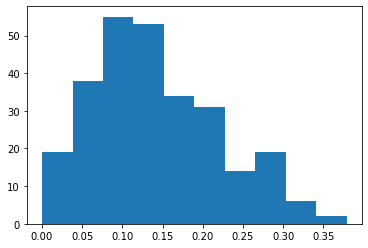

In [62]:
# VISUALIZAMOS LA DISTRIBUCIÓN DE %s DE SOBREEXTENSIÓN (SÓLO VALORES POSITIVOS / EXTENSIÓN AL ALZA)
fig = plt.figure ()
ax = plt.axes()
ax.hist(data[data['Sobre_ext'] > 0]['Sobre_ext'])

Análisis del histograma (en números): La primera columna es el rango, la segunda la cantidad de meses en que el mercado se movió en ese rango de alza sobre la MM de 30 meses, la tercera es el % de esa cantidad sobre el total (frecuencia relativa) y la última es la frecuencia acumulada. Ahí se ve más claro que entre 5 y 15% se llevan el 50% del comportamiento. O bien que el 88% de las veces se movió por debajo del 25% de sobre extensión. Más allá de eso ya se torna bastante raro/riesgoso

In [64]:
histo = data_bull[['rango', 'Sobre_ext']].groupby('rango').count()
histo['% s/ Total'] = histo['Sobre_ext'] / (histo['Sobre_ext'].sum())
histo['% acumulado'] = histo['% s/ Total'].cumsum()
histo

,Sobre_ext,% s/ Total,% acumulado
rango,,,
"(0.0, 0.05]",28,0.103321,0.103321
"(0.05, 0.1]",70,0.258303,0.361624
"(0.1, 0.15]",65,0.239852,0.601476
"(0.15, 0.2]",46,0.169742,0.771218
"(0.2, 0.25]",30,0.110701,0.881919
"(0.25, 0.3]",23,0.084871,0.966790
"(0.3, 0.35]",7,0.025830,0.992620
"(0.35, 0.4]",2,0.007380,1.000000


In [42]:
promedio = data[data['Sobre_ext'] > 0]['Sobre_ext'].mean()
std = data['Sobre_ext'].std()
print('Promedio ', promedio, 'Desvío std ', std)

Promedio  0.14158798813374077 Desvío std  0.1294545945864892


Para ver más clara la situación actual vs. los máximos, mínimos y promedios (siempre hablando de posiciones positivas del Precio sobre la MM de 30 meses), ploteé el siguiente esquema:

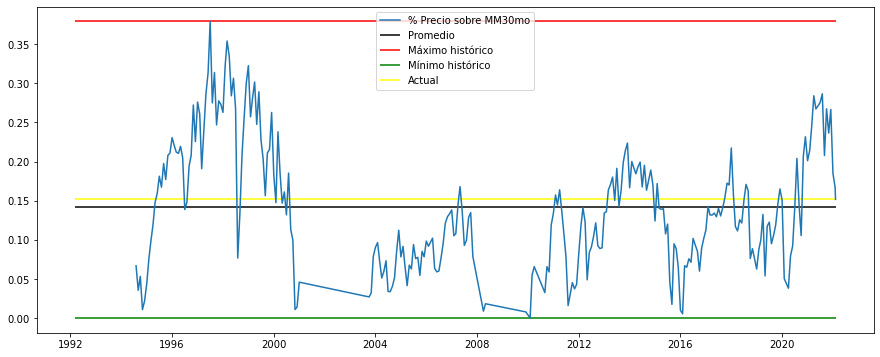

In [45]:
# PLOTEAMOS LA EXTENSIÓN COMO LÍNEA/OSCILADOR
fig = plt.figure (figsize=(15,6))
ax2 = plt.axes()
ax2.plot(data[data['Sobre_ext'] > 0]['Sobre_ext'], label='% Precio sobre MM30mo')
plt.hlines(y=promedio, xmin=data.index[0], xmax=data.index[-1], color='black', label='Promedio')
plt.hlines(y=data['Sobre_ext'].max(), xmin=data.index[0], xmax=data.index[-1], color='Red', label='Máximo histórico')
plt.hlines(y=data[data['Sobre_ext'] > 0]['Sobre_ext'].min(), xmin=data.index[0], xmax=data.index[-1], color='Green', label='Mínimo histórico')
plt.hlines(y=data[data['Sobre_ext'] > 0]['Sobre_ext'][-1], xmin=data.index[0], xmax=data.index[-1], color='Yellow', label='Actual')
plt.legend(loc=9)

Ahí vemos que al 16% aprox estamos un poco por encima del promedio histórico nomás, bastante lejos de la situación del 1997-2000. Le puse las referencias para mayor claridad.

También ahí se ve que cuando nos movíamos en el 26% estábamos mucho más cerca de esa situación crítica y entonces cada vez que decíamos "se observa sobre-extensión del precio, una toma de ganancias es saludable para la tendencia, etc, etc" estábamos en lo cierto. Lo que antes era tocar de oído ahora está probado con datos

In [47]:
data_bull = data[data['Sobre_ext'] > 0]
bins=[0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]

data_bull['rango'] = pd.cut(data_bull['Sobre_ext'], bins = bins)

<ipython-input-47-70e36c684477>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bull['rango'] = pd.cut(data_bull['Sobre_ext'], bins = bins)


In [54]:
histo = data_bull[['rango', 'Sobre_ext']].groupby('rango').count()
histo['% s/ Total'] = histo['Sobre_ext'] / (histo['Sobre_ext'].sum())
histo['% acumulado'] = histo['% s/ Total'].cumsum()
histo

,Sobre_ext,% s/ Total,% acumulado
rango,,,
"(0.0, 0.05]",28,0.103321,0.103321
"(0.05, 0.1]",70,0.258303,0.361624
"(0.1, 0.15]",65,0.239852,0.601476
"(0.15, 0.2]",46,0.169742,0.771218
"(0.2, 0.25]",30,0.110701,0.881919
"(0.25, 0.3]",23,0.084871,0.966790
"(0.3, 0.35]",7,0.025830,0.992620
"(0.35, 0.4]",2,0.007380,1.000000


El máximo se dio el 01/07/97, con un alza del 38%. Desde ahí corrigió un poco (nada brusco) y siguió subiendo hasta la burbuja .com en el 2000. Igual el MACD mensual no daba signos bajistas, venía prolijo por el 97'. Hay una vela fiera de agosto del '98 que me parece fue un hecho aislado, la crisis del petróleo?

In [66]:
print("Fecha del máximo histórico: ", data_bull['Sobre_ext'].idxmax())
print("Máximo histórico: ", data_bull['Sobre_ext'].max())

Fecha del máximo histórico:  1997-07-01 00:00:00
Máximo histórico:  0.3787682228725337
